In [41]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patches as patches


In [55]:
domain_width = 3
domain_height = 1

number_of_repeaters = 1000 

slip_rate = 1

def truncated_pareto_size_distribution(N, a=1, x_min=1e-4, x_max=1e-2):
    """Inefficient sampling routine for pareto distribution
    
    $$ p(x) = \dfrac{am^a}{x^{a+1}} $$
    
    Note that the truncation introduces a scale.
    
    """
    out = []
    count = 0
    while count < N:
        x_candidate= np.random.pareto(a)
        if x_candidate > x_min and x_candidate < x_max:
            out.append(x_candidate)
            count+=1
    return out

repeater_size = truncated_pareto_size_distribution(number_of_repeaters)

repeater_location = [
    (x,y)
    for x,y in zip(
        np.random.uniform(0,domain_width,number_of_repeaters),
        np.random.uniform(0,domain_height,number_of_repeaters),
    )
]

repeater_phase = np.random.uniform(0,2*np.pi,number_of_repeaters)

strain_drop = 1e-3   # ~ stress drop / shear modulus  -> conversion of dimension to slip
repeater_rate = slip_rate/(repeater_size*strain_drop)

repeaters = dict(
    center=repeater_location,
    radius=repeater_size,
    phase=repeater_phase,
)



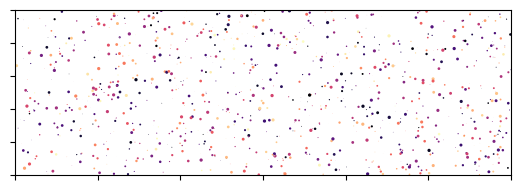

In [56]:
fig, ax = plt.subplots()
# Add circles to the plot
for center, radius, phase in zip(repeaters["center"], repeaters["radius"], repeaters["phase"]):
    circle_patch = patches.Circle(center, radius, edgecolor=None, facecolor=mpl.cm.magma(phase/(2*np.pi)))
    ax.add_patch(circle_patch)
    
ax.set(
    aspect='equal',
    xticklabels=[],
    yticklabels=[],
    xlim=(0,domain_width),
    ylim=(0,domain_height),
);

### Notes on repeaters in a coupled oscillator system:

- Repeaters have a lifetime
- size and frequency are tied
- size and coupling are tied

In [100]:
T = 1000
dt = 0.01
current_time = 1

def step(phase, natural_frequency, location, size, dt):
    
    rate_of_change = (
        natural_frequency -                                                               # natural frequency
        (
            ((location[:, np.newaxis] - location[np.newaxis, :])**2).sum(axis=2) / size *     # coupling strength (units don't quite work)
            np.sin(phase[:,np.newaxis] - phase[np.newaxis,:])                                 # Kuramoto phase dependence
        ).sum(axis=1)
    )
    
    return phase+rate_of_change*dt

In [117]:
import numpy as np

np.array([5,6,7,8,9])%(2*np.pi)

array([5.        , 6.        , 0.71681469, 1.71681469, 2.71681469])